In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
import umap

def pca(data):
    '''PCA'''
    # Separate gene ID and gene name columns
    gene_info = data[['gene_id', 'gene_name', 'gene_type']]
    # Select only the expression data columns for PCA
    expression_data = data.drop(['gene_id', 'gene_name', 'gene_type'], axis=1)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(expression_data)

    # Apply PCA
    pca = PCA(n_components=2)  # You can change the number of components as needed
    principal_components = pca.fit_transform(scaled_data)

def tsne(data):
    selected_columns = data.iloc[:, 3:]  

    tsne = TSNE(n_components=2, perplexity=30)  # Adjust parameters as needed

    # Perform t-SNE
    tsne_result = tsne.fit_transform(selected_columns)

def Umap(data):
    selected_columns = data.iloc[:, 3:]  
    umap_reducer = umap.UMAP(n_components=2)  

    umap_result = umap_reducer.fit_transform(selected_columns)

def ica(data):
    gene_expression = data.iloc[:, 3:]  
    ica = FastICA(n_components=2, random_state=42)


    ica.fit(gene_expression)

    independent_components = ica.transform(gene_expression)

def vae(data):
    expression_data = data.iloc[:, 3:].values


    expression_data = (expression_data - np.min(expression_data)) / (np.max(expression_data) - np.min(expression_data))

    latent_dim = 2 

    encoder_inputs = keras.Input(shape=(expression_data.shape[1],))
    x = keras.layers.Dense(256, activation='relu')(encoder_inputs)
    x = keras.layers.Dense(128, activation='relu')(x)
    z_mean = keras.layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = keras.layers.Dense(latent_dim, name='z_log_var')(x)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = keras.layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    decoder_inputs = keras.layers.Dense(128, activation='relu')(z)
    decoder_outputs = keras.layers.Dense(expression_data.shape[1], activation='sigmoid')(decoder_inputs)

    vae = keras.Model(encoder_inputs, decoder_outputs)

    reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, decoder_outputs)
    reconstruction_loss *= expression_data.shape[1]
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_mean(kl_loss)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')

    vae.fit(expression_data, epochs=50, batch_size=32)

    encoder = keras.Model(encoder_inputs, z_mean)
    encoded_data = encoder.predict(expression_data)


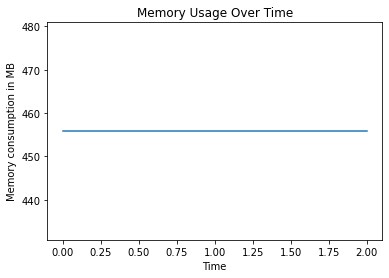

In [3]:
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

# Your algorithm/function
def your_algorithm():
    # Code for your algorithm goes here
    pass

# Measure memory usage
mem_usage = memory_usage((pca(data), (), {}))

# Plotting memory usage
plt.plot(mem_usage)
plt.xlabel('Time')
plt.ylabel('Memory consumption in MB')
plt.title('Memory Usage Over Time')
plt.show()
